In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot Settings and  load the dataset

In [ ]:
#Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#Dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Basic information and class distribution

In [ ]:
print("Shape", df.shape)
df.info()

Shape (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False))


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
print("\nClass distribution:")
print(df['Class'].value_counts())
print("\nPercentage of frauds: {:.4f}%".format(df['Class'].mean() * 100))


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of frauds: 0.1727%


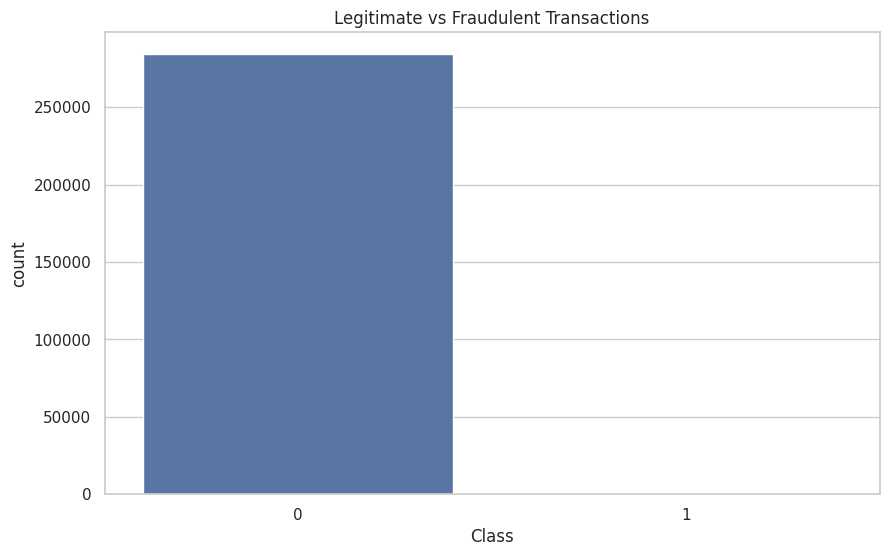

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Legitimate vs Fraudulent Transactions")
plt.show()

# Distribution of Amount and Time variables

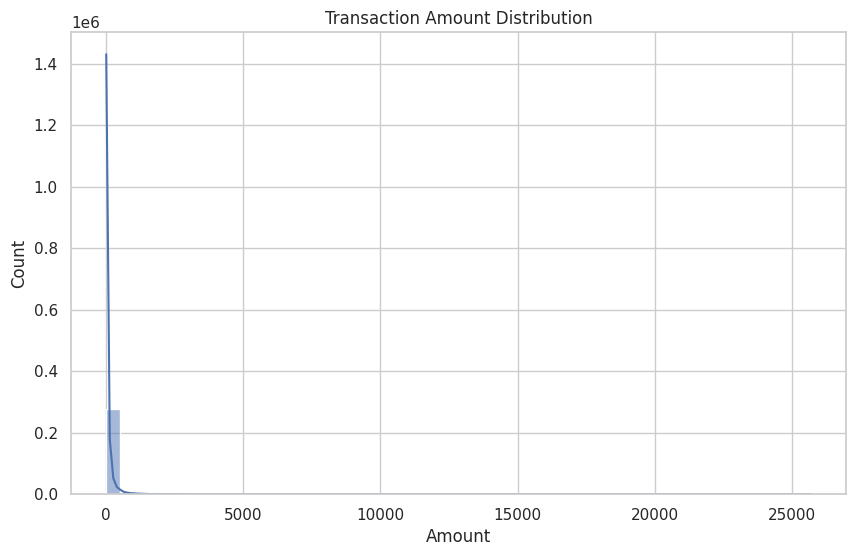

In [ ]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

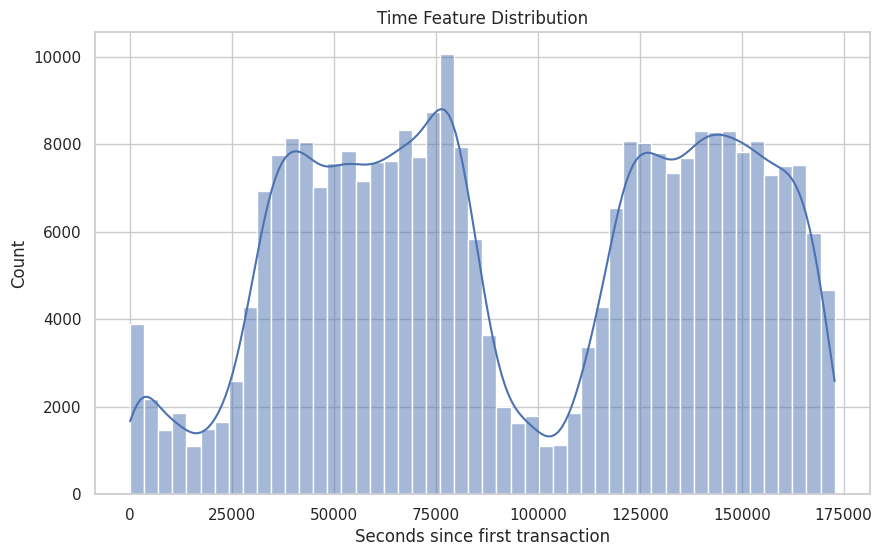

In [ ]:
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Time Feature Distribution")
plt.xlabel("Seconds since first transaction")
plt.show()

# Correlation Matrix

In [ ]:
corr = df.corr()

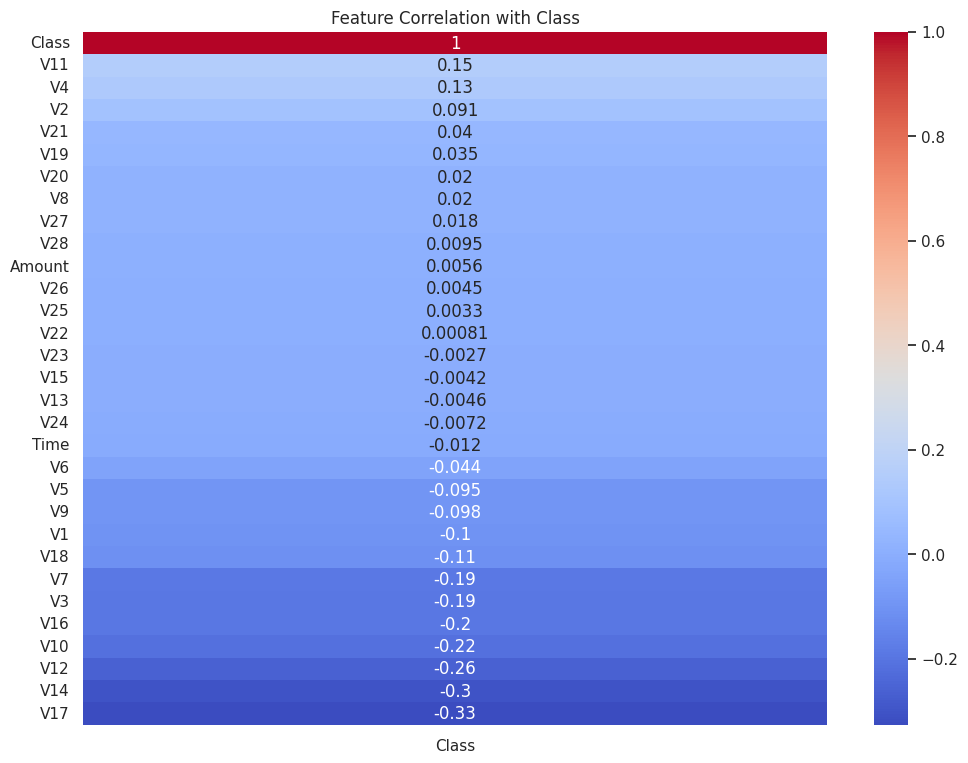

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Class")
plt.show()

# 2D Visualization with PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X_pca = df.drop(['Time', 'Amount', 'Class'], axis=1)
Y_pca = df['Class']

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_pca)

In [ ]:
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Class'] = Y_pca.values

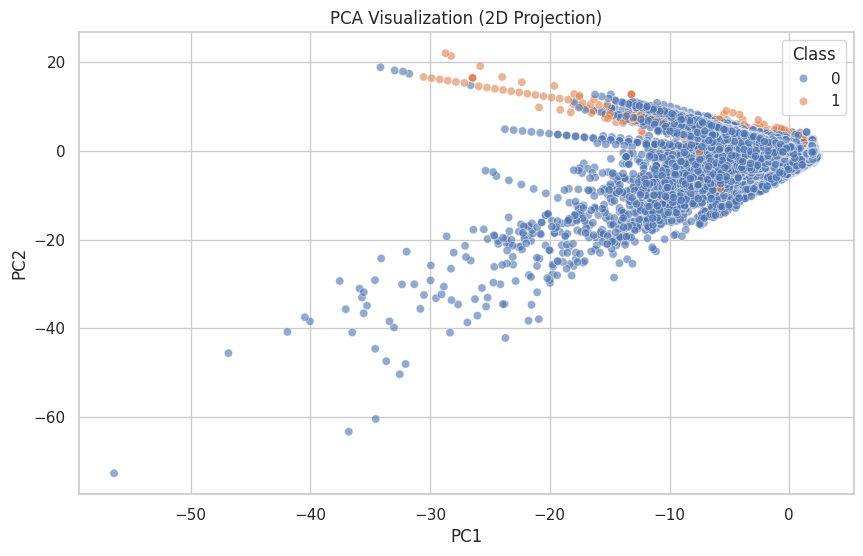

In [ ]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', alpha=0.6)
plt.title("PCA Visualization (2D Projection)")
plt.show()
